In [0]:
import requests
class ISICApi(object):
    def __init__(self, hostname='https://isic-archive.com',
                 username=None, password=None):
        
        self.baseUrl = f'{hostname}/api/v1/'
        self.authToken = None

        if username is not None:
            if password is None:
                password = input(f'Password for user "{username}":')
            self.authToken = self._login(username, password)

    def _makeUrl(self, endpoint):
        return f'{self.baseUrl}/{endpoint}'

    def _login(self, username, password):
        authResponse = requests.get(
            self._makeUrl('user/authentication'),
            auth=(username, password)
        )
        if not authResponse.ok:
            raise Exception(f'Login error: {authResponse.json()["message"]}')

        authToken = authResponse.json()['authToken']['token']
        return authToken

    def get(self, endpoint):
        url = self._makeUrl(endpoint)
        headers = {'Girder-Token': self.authToken} if self.authToken else None
        return requests.get(url, headers=headers)

    def getJson(self, endpoint):
        return self.get(endpoint).json()

    def getJsonList(self, endpoint):
        endpoint += '&' if '?' in endpoint else '?'
        LIMIT = 50
        offset = 0
        while True:
            resp = self.get(
                f'{endpoint}limit={LIMIT:d}&offset={offset:d}'
            ).json()
            if not resp:
                break
            for elem in resp:
                yield elem
            offset += LIMIT

In [0]:
api = ISICApi(username="sallarkhan", password="star1234++")
#imageList = api.getJson('image?limit=100&offset=0&sort=name')

In [0]:
imageList = api.getJson('image?limit=10000&offset=0&sort=name')

In [4]:
    import urllib
    import os
    IMAGE_DOWNLOAD_LENGTH = 10000 #enter the length of images to download
    
    # Initialize the API; no login is necessary for public data
    api = ISICApi()
    savePath = 'Nevus/'

    if not os.path.exists(savePath):
        os.makedirs(savePath)

    imageList = api.getJson('image?limit={}&offset=0&sort=name'.format(IMAGE_DOWNLOAD_LENGTH))

    print('Downloading %s images' % len(imageList))
    imageDetails = []
    for image in imageList:
      print(image['_id'])
      imageFileResp = api.get('image/%s/download' % image['_id'])
      imageFileResp.raise_for_status()
      imageFileOutputPath = os.path.join(savePath, '%s.jpg' % image['name'])
      with open(imageFileOutputPath, 'wb') as imageFileOutputStream:
          for chunk in imageFileResp:
              imageFileOutputStream.write(chunk)

Streaming output truncated to the last 5000 lines.
54e7dff2bae4780ec59cedf5
54e7dff3bae4780ec59cedfa
54e7dff3bae4780ec59cedff
54e7dff6bae4780ec59cee04
54e7dff8bae4780ec59cee09
54e7dff8bae4780ec59cee0e
54e7dff9bae4780ec59cee13
54e7dff9bae4780ec59cee18
54e7dffabae4780ec59cee1d
54e7dffbbae4780ec59cee22
54e7dffbbae4780ec59cee27
54e7dffdbae4780ec59cee2c
54e7dffebae4780ec59cee31
54e7dffebae4780ec59cee36
54e7dfffbae4780ec59cee3b
54e7dfffbae4780ec59cee40
54e7e000bae4780ec59cee45
54e7e000bae4780ec59cee4a
54e7e000bae4780ec59cee4f
54e7e003bae4780ec59cee54
54e7e004bae4780ec59cee59
54e7e004bae4780ec59cee5e
54e7e005bae4780ec59cee63
54e7e005bae4780ec59cee68
54e7e006bae4780ec59cee6d
54e7e006bae4780ec59cee72
54e7e007bae4780ec59cee77
54e7e009bae4780ec59cee7c
54e7e009bae4780ec59cee81
54e7e00abae4780ec59cee86
54e7e00abae4780ec59cee8b
54e7e00bbae4780ec59cee90
54e7e00bbae4780ec59cee95
54e7e00bbae4780ec59cee9a
54e7e00cbae4780ec59cee9f
54e7e00cbae4780ec59ceea4
54e7e00dbae4780ec59ceea9
54e7e00fbae4780ec59ceeae

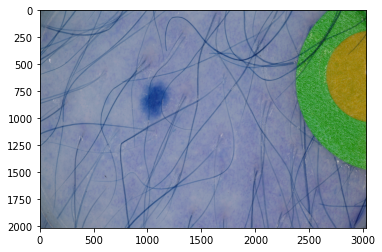

In [5]:
import cv2
import matplotlib.pyplot as plt
plt.imshow(cv2.imread('/content/Nevus/ISIC_0000746.jpg'))

In [0]:
import os

In [7]:
len(os.listdir('/content/Nevus'))

10000

In [8]:
from google.colab import files
#downloading the Melanoma dataset
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then copy kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!kaggle datasets download -d drscarlat/melanoma 
#downloading the dataset from kaggle
!unzip melanoma.zip

Streaming output truncated to the last 5000 lines.
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031355.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031357.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031358.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031362.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031363.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031365.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031366.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031367.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031370.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031375.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031380.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031382.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031383.jpg  
  inflating: dermmel/DermMel/train_sep/

In [0]:
len(os.listdir('/content/dermmel/DermMel/valid/Melanoma')),len(os.listdir('/content/dermmel/DermMel/test/Melanoma')),len(os.listdir('/content/dermmel/DermMel/train_sep/Melanoma'))

(1781, 1781, 5341)

In [0]:
1781+1781+5341

8903

In [9]:
#removing Melonama images
train = os.listdir('/content/dermmel/DermMel/train_sep/NotMelanoma')
test = os.listdir('/content/dermmel/DermMel/test/NotMelanoma')
valid = os.listdir('/content/dermmel/DermMel/valid/NotMelanoma')
print("Removing from trian NotMelanoma")
for i in train:
  os.remove('/content/dermmel/DermMel/train_sep/NotMelanoma/{}'.format(i))
print("Removing from test NotMelanoma")
for i in test:
  os.remove('/content/dermmel/DermMel/test/NotMelanoma/{}'.format(i))
print("Removing from valid NotMelanoma")
for i in valid:
  os.remove('/content/dermmel/DermMel/valid/NotMelanoma/{}'.format(i))


Removing from trian NotMelanoma
Removing from test NotMelanoma
Removing from valid NotMelanoma


TransFering IMAGES <br>
trainImages per classes ==> 5341 <br>
TestImages per classes ==> 1781 <br>
TestImages per classes ==> 1781

In [0]:
os.rename('/content/dermmel/DermMel/test/NotMelanoma','/content/dermmel/DermMel/test/Nevus')
os.rename('/content/dermmel/DermMel/valid/NotMelanoma','/content/dermmel/DermMel/valid/Nevus')
os.rename('/content/dermmel/DermMel/train_sep/NotMelanoma','/content/dermmel/DermMel/train_sep/Nevus')

In [0]:
#FOR NEVUS
train = 5341
test = 1781
valid = 1781
train_images = os.listdir('/content/Nevus')[:train]
test_images = os.listdir('/content/Nevus')[train:train+test]
valid_images = os.listdir('/content/Nevus')[train+test:]

In [12]:
import cv2
print("\t\t FOR NEVUS")
for i in train_images:
  img = cv2.imread('/content/Nevus/{}'.format(i))        
  cv2.imwrite('/content/dermmel/DermMel/train_sep/Nevus/{}'.format(i),img)
print("Train images trasfered")
for i in test_images:
  img = cv2.imread('/content/Nevus/{}'.format(i))
  cv2.imwrite('/content/dermmel/DermMel/test/Nevus/{}'.format(i),img)
print("Test images trasfered")
for i in valid_images:
  img = cv2.imread('/content/Nevus/{}'.format(i))
  cv2.imwrite('/content/dermmel/DermMel/valid/Nevus/{}'.format(i),img)
print("valid images trasfered")

		 FOR NEVUS
Train images trasfered
Test images trasfered
valid images trasfered


In [0]:
for i in valid_images[:1097]:
  os.remove('/content/dermmel/DermMel/valid/Nevus/{}'.format(i))
os.remove('/content/dermmel/DermMel/test/Nevus/{}'.format(test_images[0]))

In [18]:
len(os.listdir('/content/dermmel/DermMel/valid/Melanoma')),len(os.listdir('/content/dermmel/DermMel/valid/Nevus'))

(1781, 1781)

In [14]:
len(os.listdir('/content/dermmel/DermMel/test/Melanoma')),len(os.listdir('/content/dermmel/DermMel/test/Nevus'))

(1781, 1781)

In [15]:
len(os.listdir('/content/dermmel/DermMel/train_sep/Melanoma')),len(os.listdir('/content/dermmel/DermMel/train_sep/Nevus'))

(5341, 5341)

In [0]:
#preparing the code 


In [0]:
#zipping the file
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

if __name__ == '__main__':
    zipf = zipfile.ZipFile('Nevus.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('/content/dermmel/', zipf)
    zipf.close()

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#removing images froom NEVUS folder
n = os.listdir('/content/Nevus')
for i in n:
  os.remove('/content/Nevus/{}'.format(i))

In [0]:
from shutil import copyfile
copyfile('/content/Nevus.zip', '/content/drive/My Drive/Nevus.zip')

'/content/drive/My Drive/Nevus.zip'

In [0]:
size = os.stat('/content/Nevus.zip').st_size #returns size in bytes
# 1GB = 1e9 byte
print("File size is ===> "+str(size/1E9)+" GB")

File size is ===> 13.363004558 GB


1000000000.0